# IMPORT THE LIBRARIES

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA ANALYSIS AND PREPROCESSING

In [111]:
data=pd.read_csv("Walmart Data Analysis and Forcasting.csv")
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [113]:
data.duplicated().sum()

np.int64(0)

In [114]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [115]:
for column in data.columns:
    print(f"Unique Values for {column}:")
    print(data[column].unique())

Unique Values for Store:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Unique Values for Date:
['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '04-03-2011' '11-03-2011' '18-03-2011' '25-03-2011'
 '01-04-2011' '08-04-

In [116]:
data['Date'] = pd.to_datetime(data['Date'],format="%d-%m-%Y")
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [117]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


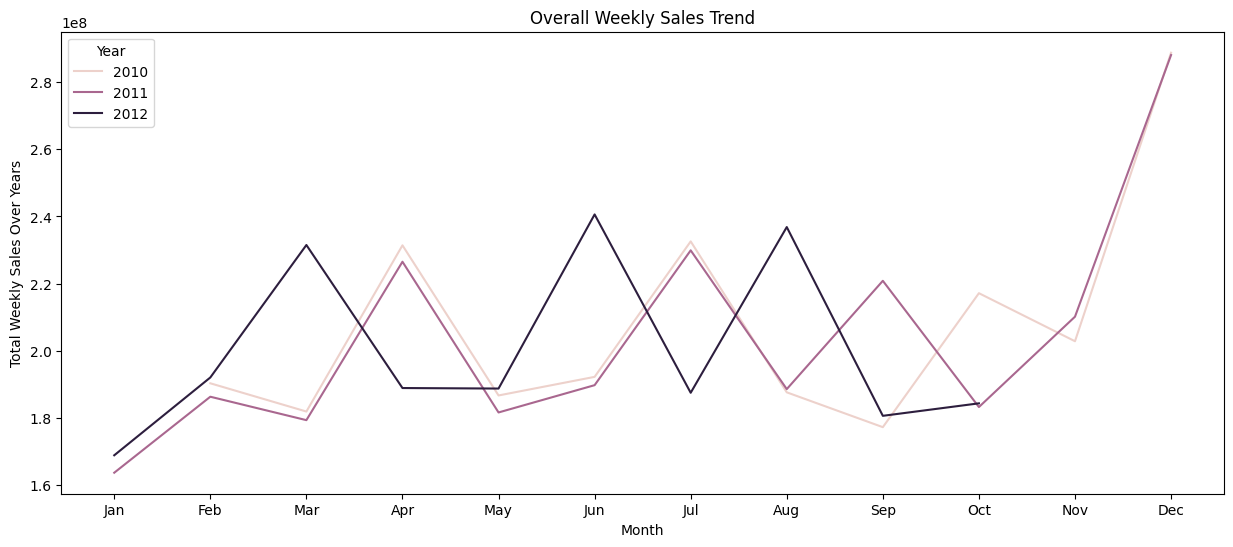

In [118]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='Month', y='Weekly_Sales', data=data.groupby(['Year','Month'])['Weekly_Sales'].sum().reset_index(),hue='Year')
plt.title('Overall Weekly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Weekly Sales Over Years')
plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10)
plt.show()

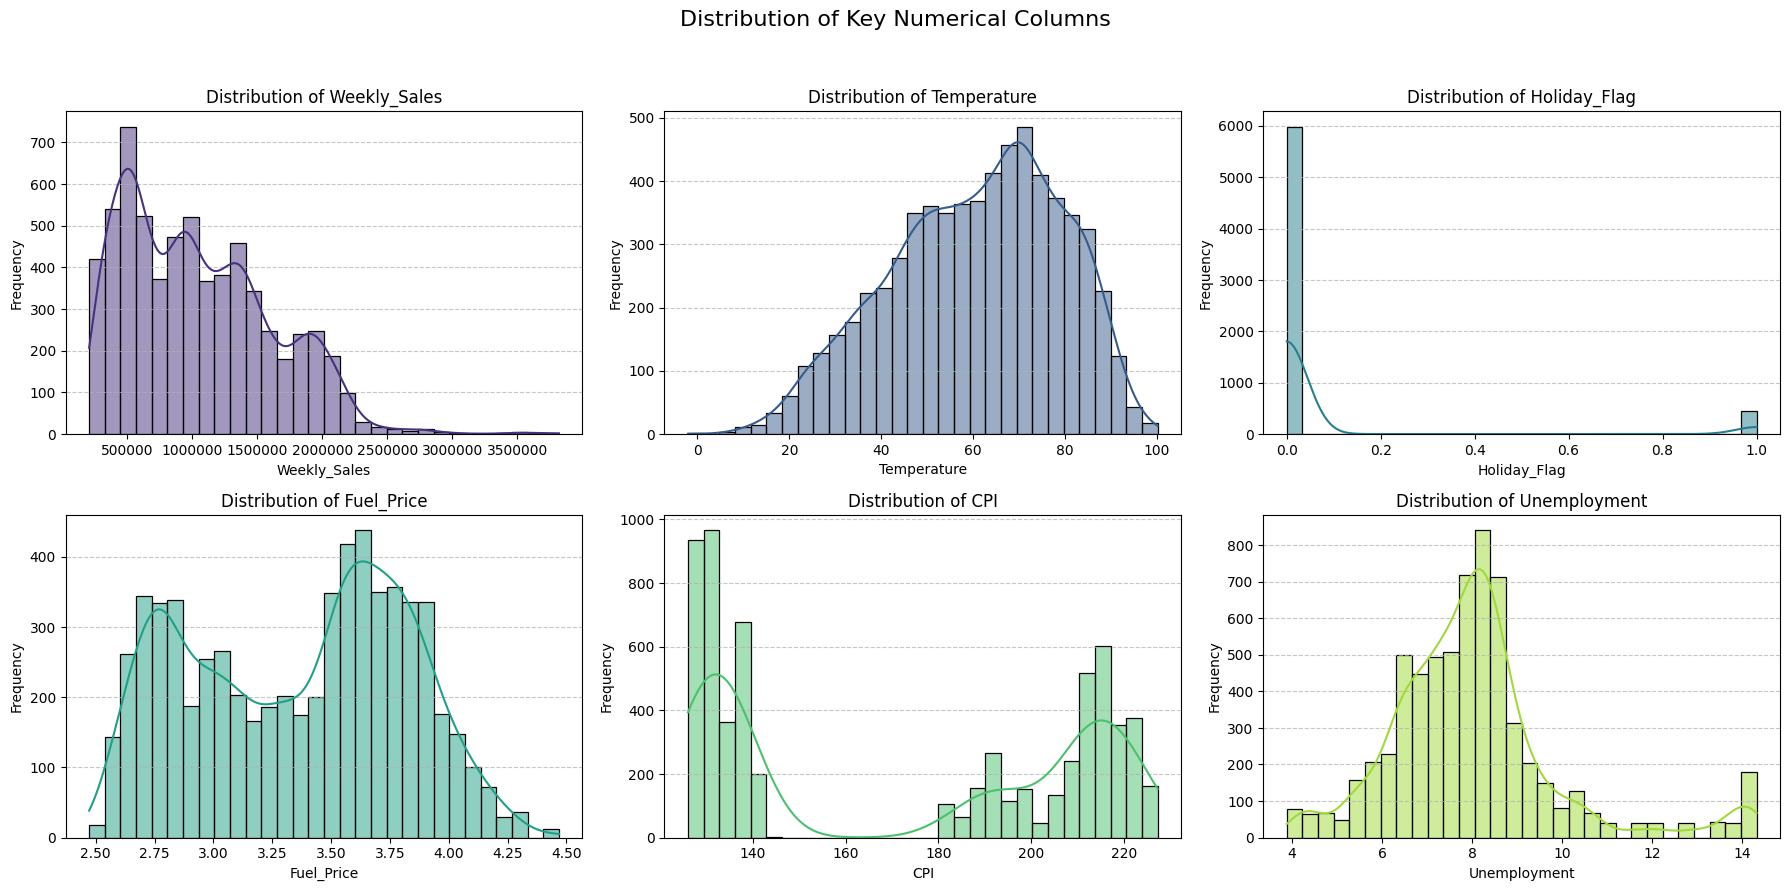

In [119]:
selected_numeric_cols = ['Weekly_Sales', 'Temperature', 'Holiday_Flag', 'Fuel_Price', 'CPI', 'Unemployment']

num_plots = len(selected_numeric_cols)
num_cols = 3 
num_rows = (num_plots + num_cols - 1) 

plt.figure(figsize=(num_cols * 6, num_rows * 4)) 

for i, col in enumerate(selected_numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1) 
    sns.histplot(data[col], kde=True, bins=30, color=sns.color_palette('viridis')[i % len(selected_numeric_cols)]) 
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.ticklabel_format(style='plain', axis='x') 
    plt.ticklabel_format(style='plain', axis='y') 

plt.tight_layout() 
plt.suptitle('Distribution of Key Numerical Columns', y=1.02, fontsize=16) 
plt.show()

### The long tail of high sales strongly suggests the impact of significant events like holidays or major promotional campaigns, causing massive spikes in weekly revenue.

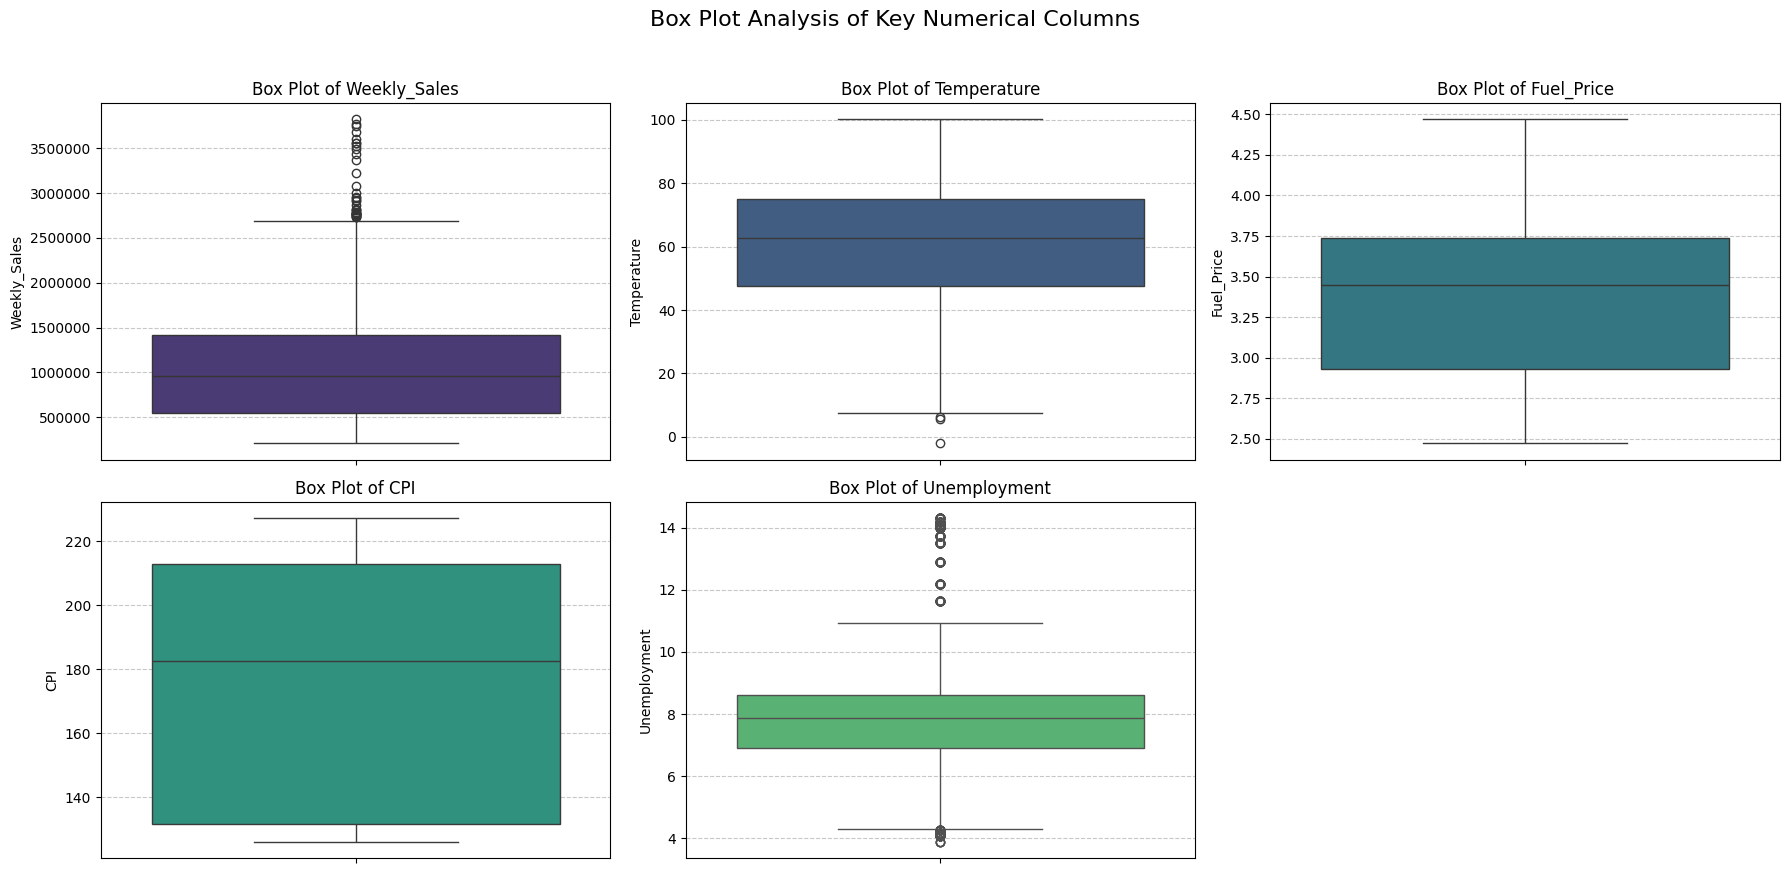

In [120]:
selected_numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

num_plots = len(selected_numeric_cols)
num_cols = 3 
num_rows = (num_plots + num_cols - 1) 

plt.figure(figsize=(num_cols * 6, num_rows * 4)) 
for i, col in enumerate(selected_numeric_cols):
    plt.subplot(num_rows, num_cols, i + 1) 
    sns.boxplot(y=data[col], color=sns.color_palette('viridis')[i % len(selected_numeric_cols)])
    plt.title(f'Box Plot of {col}', fontsize=12)
    plt.ylabel(col, fontsize=10) 
    plt.grid(axis='y', linestyle='--', alpha=0.7) 
    plt.ticklabel_format(style='plain', axis='y') 

plt.tight_layout() 
plt.suptitle('Box Plot Analysis of Key Numerical Columns', y=1.02, fontsize=16) 
plt.show()

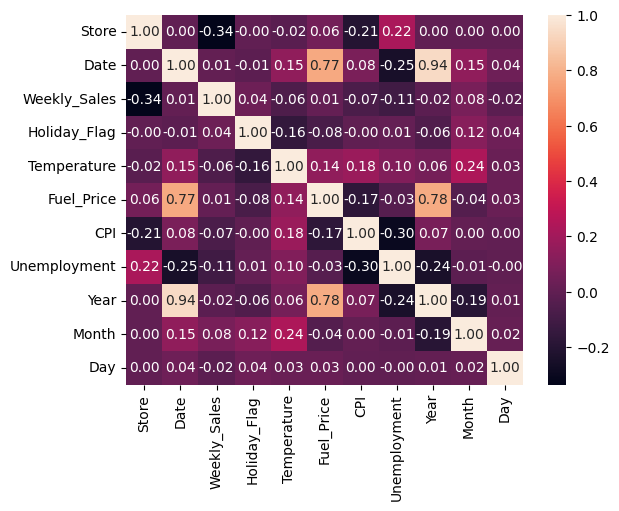

In [121]:
sns.heatmap(data.corr(),fmt='.2f',annot=True)
plt.show()

### Fuel_Price vs. Date: There's a strong positive correlation between 'Fuel_Price' and 'Date'. This indicates that fuel prices generally increased over the period covered by the dataset.

### Unemployment vs. Date: Negative correlation with 'Date'. This suggests unemployment generally decreased over the dataset's timeframe.

### CPI vs. Date: Positive correlation with 'Date'. CPI generally increased over time.

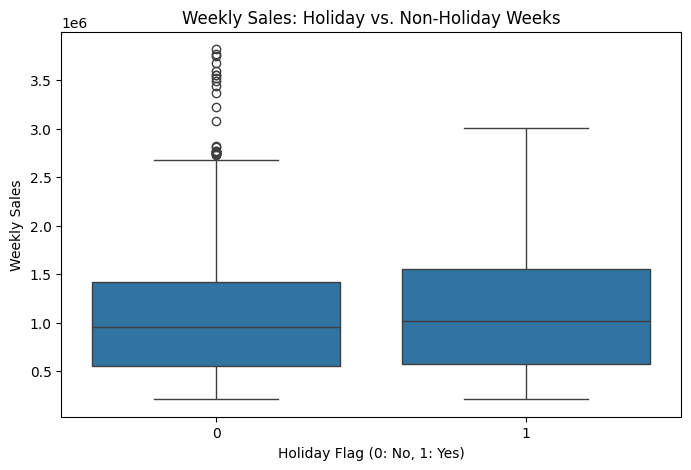

In [122]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Holiday_Flag', y='Weekly_Sales', data=data)
plt.title('Weekly Sales: Holiday vs. Non-Holiday Weeks')
plt.xlabel('Holiday Flag (0: No, 1: Yes)')
plt.ylabel('Weekly Sales')
plt.show()

# FEATURE ENGINEERING

In [123]:
# Create lag features
data = data.sort_values(by=['Store', 'Date'])
data['Weekly_Sales_Lag_1'] = data.groupby('Store')['Weekly_Sales'].shift(1)
data['Weekly_Sales_Lag_2'] = data.groupby('Store')['Weekly_Sales'].shift(2)
data['Weekly_Sales_Lag_4'] = data.groupby('Store')['Weekly_Sales'].shift(4) 
data['Weekly_Sales_Lag_52'] = data.groupby('Store')['Weekly_Sales'].shift(52)

In [124]:
# Moving Average
data['Weekly_Sales_MA_4'] = data.groupby('Store')['Weekly_Sales'].rolling(window=4, min_periods=1).mean().reset_index(level=0, drop=True)

In [125]:
total_sales_per_store = data.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [126]:
data['Weekly_Sales_log'] = np.log1p(data['Weekly_Sales'])

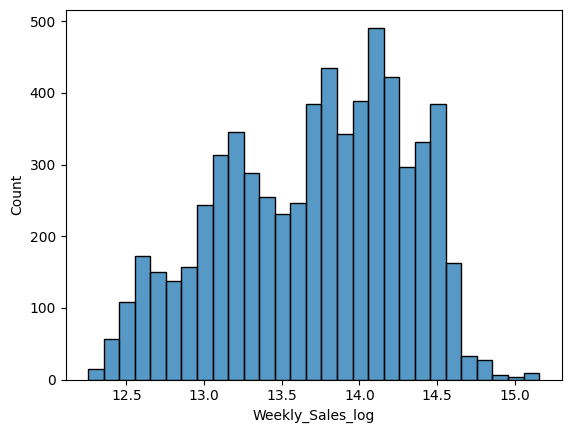

In [127]:
sns.histplot(data['Weekly_Sales_log'])
plt.show()

In [128]:
initial_rows_before_drop = data.shape[0]
data_model = data.dropna().copy() 
rows_dropped = initial_rows_before_drop - data_model.shape[0]
print(f"\nDropped {rows_dropped} rows containing NaN values after feature engineering.")
print(f"Remaining data shape: {data_model.shape}")


Dropped 2340 rows containing NaN values after feature engineering.
Remaining data shape: (4095, 17)


In [129]:
target = 'Weekly_Sales_log'

features = [col for col in data_model.columns if col not in ['Weekly_Sales', 'Date','Year','Month','Day', target]]

X = data_model[features]
y = data_model[target]

print(f"\nFeatures selected ({len(features)}): {features[::]} ")
print(f"Target variable: {target}")
print(f"X shape: {X.shape}, y shape: {y.shape}")


Features selected (11): ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales_Lag_1', 'Weekly_Sales_Lag_2', 'Weekly_Sales_Lag_4', 'Weekly_Sales_Lag_52', 'Weekly_Sales_MA_4'] 
Target variable: Weekly_Sales_log
X shape: (4095, 11), y shape: (4095,)


### TRAINING MODEL ON SALES BEFORE 01-07-2012 AND TESTING MODEL ON DATA AFTER THAT DAY

In [130]:
data_model = data_model.sort_values(by='Date')


split_date = pd.to_datetime('2012-08-01') 

X_train = X[data_model['Date'] <= split_date]
y_train = y[data_model['Date'] <= split_date]
X_test = X[data_model['Date'] > split_date]
y_test = y[data_model['Date'] > split_date]

X_train_indices = X_train.index
X_test_indices = X_test.index


print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3510, 11), y_train shape: (3510,)
X_test shape: (585, 11), y_test shape: (585,)


C:\Users\Dell\AppData\Local\Temp\ipykernel_12056\3384497162.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train = X[data_model['Date'] <= split_date]
C:\Users\Dell\AppData\Local\Temp\ipykernel_12056\3384497162.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_test = X[data_model['Date'] > split_date]


# MODEL BUILDING

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining RandomForestRegressor...")

rf_model.fit(X_train, y_train)
print("Model training complete.")


Training RandomForestRegressor...
Model training complete.


# PREDICTION AND INVERSE TRANSFORMATION

In [132]:
y_pred_log = rf_model.predict(X_test)
y_pred_original = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test)
y_pred_original[y_pred_original < 0] = 0

print("\nSample of Actual vs. Predicted Sales (first 10):")
comparison_df = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})
print(comparison_df.head(10))


Sample of Actual vs. Predicted Sales (first 10):
         Actual     Predicted
130  1631135.79  1.643504e+06
131  1592409.97  1.551122e+06
132  1597868.05  1.556799e+06
133  1494122.38  1.536857e+06
134  1582083.40  1.603466e+06
135  1661767.33  1.625157e+06
136  1517428.87  1.548536e+06
137  1506126.06  1.501207e+06
138  1437059.26  1.491116e+06
139  1670785.97  1.641515e+06


# MODEL PERFORMANCE EVALUATION


In [133]:
mae = mean_absolute_error(y_test_original, y_pred_original)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R2): {r2:.4f}")

Mean Absolute Error (MAE): 32,085.72
Root Mean Squared Error (RMSE): 50,534.32
R-squared (R2): 0.9908


In [134]:
plot_data = data_model.loc[X_test.index].copy() 
plot_data['Actual_Sales'] = y_test_original
plot_data['Predicted_Sales'] = y_pred_original

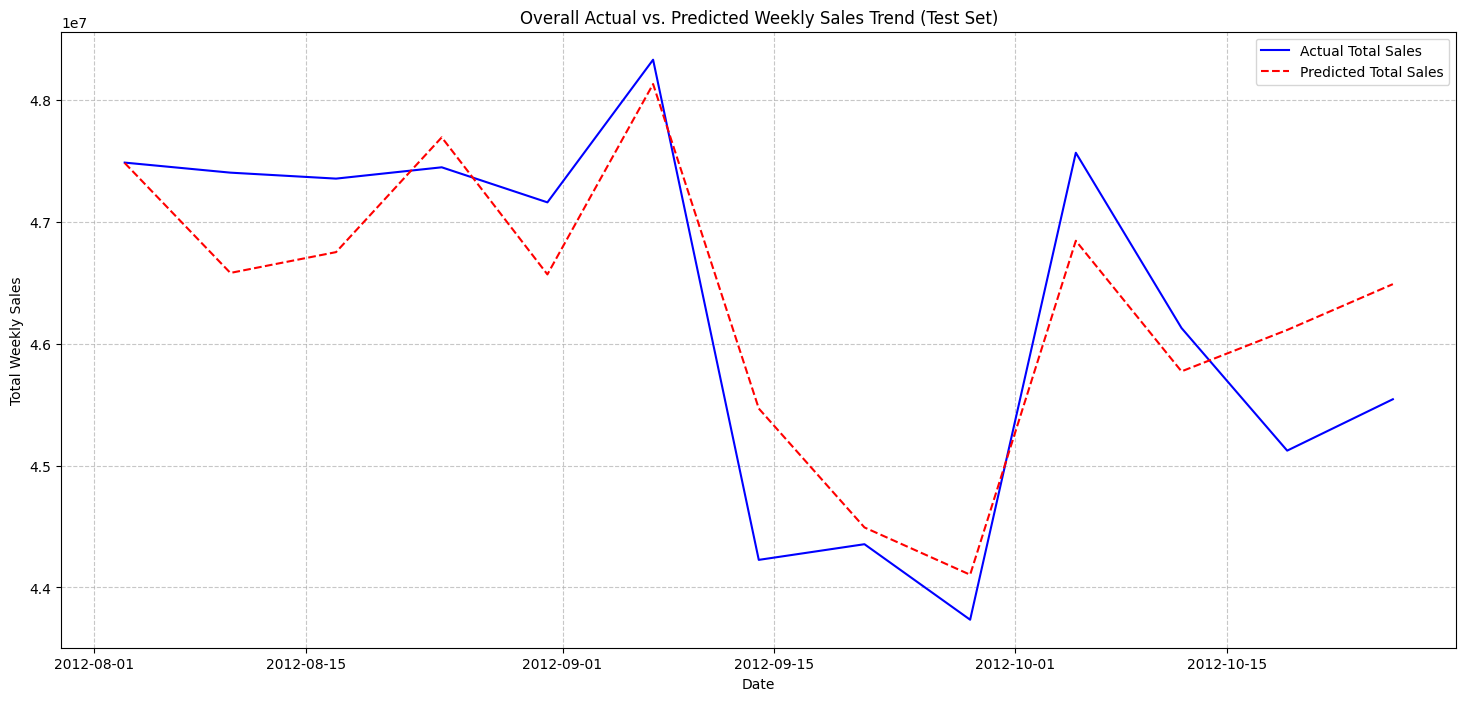

In [135]:
plt.figure(figsize=(18, 8))
sns.lineplot(x='Date', y='Actual_Sales', data=plot_data.groupby('Date')['Actual_Sales'].sum().reset_index(), label='Actual Total Sales', color='blue')
sns.lineplot(x='Date', y='Predicted_Sales', data=plot_data.groupby('Date')['Predicted_Sales'].sum().reset_index(), label='Predicted Total Sales', color='red', linestyle='--')
plt.title('Overall Actual vs. Predicted Weekly Sales Trend (Test Set)')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# ERROR ANALYSIS

In [136]:
plot_data['Error'] = plot_data['Actual_Sales'] - plot_data['Predicted_Sales']
plot_data['Abs_Error'] = np.abs(plot_data['Error'])

In [140]:
# TOP 10 ERRORS
top_10_errors=plot_data.sort_values(by='Abs_Error',ascending=False)
top_10_errors.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,...,Weekly_Sales_Lag_1,Weekly_Sales_Lag_2,Weekly_Sales_Lag_4,Weekly_Sales_Lag_52,Weekly_Sales_MA_4,Weekly_Sales_log,Actual_Sales,Predicted_Sales,Error,Abs_Error
2565,18,2012-08-31,1117097.23,0,70.09,3.884,138.377194,8.535,2012,8,...,1145840.91,1048134.24,1052066.58,540922.94,1.069594e+06,13.926245,1117097.23,6.601720e+05,456925.244956,456925.244956
1992,14,2012-08-24,1621841.33,0,72.62,3.834,191.344887,8.684,2012,8,...,1660433.30,1648570.03,1479514.66,2273470.62,1.646933e+06,14.299073,1621841.33,2.060298e+06,-438456.523566,438456.523566
1994,14,2012-09-07,1904512.34,1,75.70,3.911,191.577676,8.684,2012,9,...,1613342.19,1621841.33,1648570.03,2202742.90,1.700032e+06,14.459737,1904512.34,2.078172e+06,-173659.371674,173659.371674
2858,20,2012-10-19,1999363.49,0,56.26,3.969,216.146470,7.293,2012,10,...,2162951.36,2246411.89,2028587.24,2104241.90,2.104269e+06,14.508340,1999363.49,2.157488e+06,-158124.297645,158124.297645
1852,13,2012-09-14,1919917.03,0,68.55,3.749,130.977667,5.765,2012,9,...,2165796.31,2073855.42,2095769.18,1923223.82,2.054757e+06,14.467793,1919917.03,2.070799e+06,-150882.163443,150882.163443
2000,14,2012-10-19,1590274.72,0,56.47,3.969,192.330854,8.667,2012,10,...,1639585.61,1687592.16,1565352.46,2009004.59,1.609991e+06,14.279418,1590274.72,1.740876e+06,-150601.094430,150601.094430
2423,17,2012-09-07,1255633.29,1,61.99,3.689,130.932548,5.936,2012,9,...,865924.20,924299.78,849074.04,1161900.18,9.726964e+05,14.043151,1255633.29,1.112952e+06,142681.132983,142681.132983
3852,27,2012-08-31,1731935.43,0,75.00,4.026,142.405448,8.239,2012,8,...,1780443.36,1735339.59,1705810.84,1511717.53,1.742064e+06,14.364751,1731935.43,1.589781e+06,142154.093200,142154.093200
5568,39,2012-08-31,1710923.94,0,83.72,3.638,220.985396,6.623,2012,8,...,1724669.75,1720221.91,1608277.74,1465089.85,1.699421e+06,14.352545,1710923.94,1.570146e+06,140777.572332,140777.572332
1572,11,2012-10-26,1200729.45,0,74.26,3.506,226.987364,6.034,2012,10,...,1232073.18,1311965.09,1227430.73,1310684.10,1.291890e+06,13.998441,1200729.45,1.340761e+06,-140031.847616,140031.847616


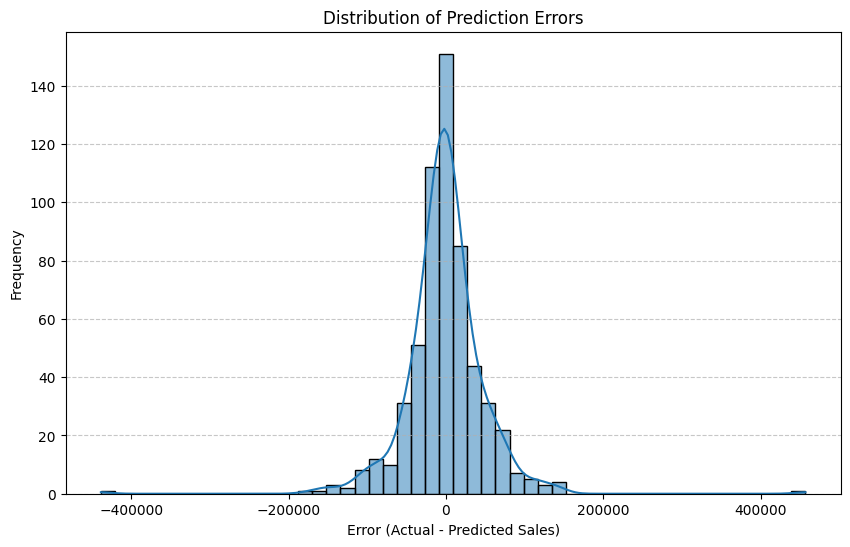

In [142]:
# ERROR DISTRIBUTION
plt.figure(figsize=(10, 6))
sns.histplot(plot_data['Error'], kde=True, bins=50)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error (Actual - Predicted Sales)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


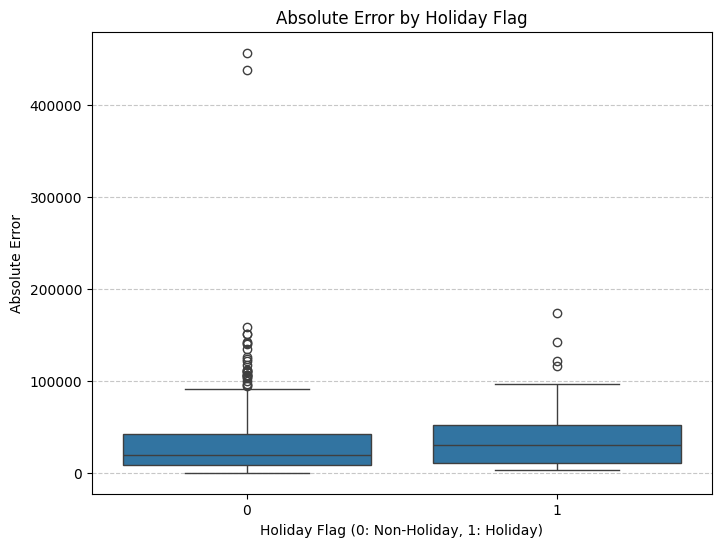

In [143]:
# ERRORS ACCORDING TO HOLIDAYS
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Flag', y='Abs_Error', data=plot_data)
plt.title('Absolute Error by Holiday Flag')
plt.xlabel('Holiday Flag (0: Non-Holiday, 1: Holiday)')
plt.ylabel('Absolute Error')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

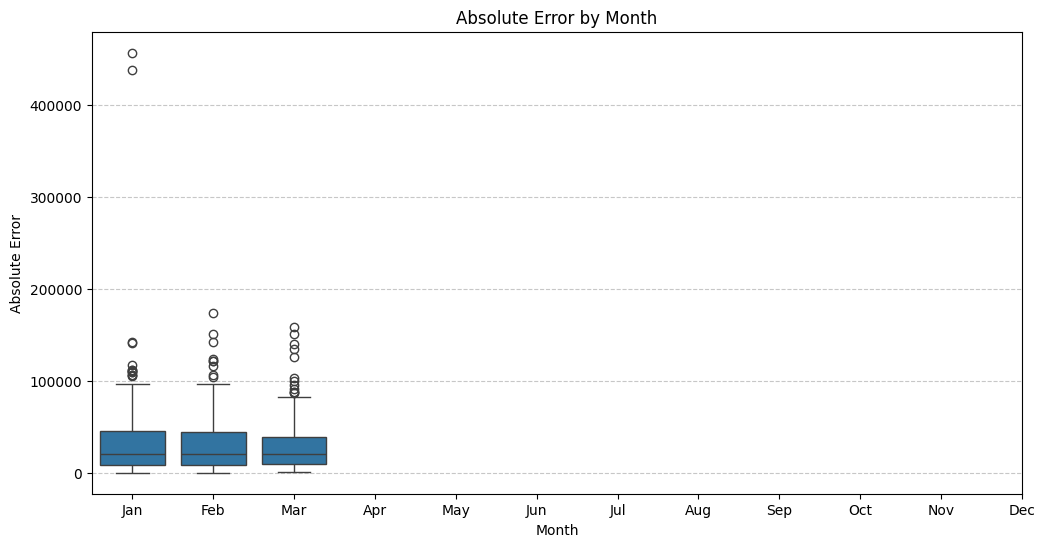

In [144]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Abs_Error', data=plot_data)
plt.title('Absolute Error by Month')
plt.xlabel('Month')
plt.ylabel('Absolute Error')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()